## imports and configs

In [36]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import html5lib
import os
import urllib3
import requests

pd.set_option('display.max_colwidth', 1000)

## train and test data

In [2]:
train_df = pd.read_csv(r"C:\Users\wrigh\Code\stratascratch\keyword_direction\datasets\train.csv")

In [3]:
train_df

,url,doc_id,label
0,http://elbe-elster-klinikum.de/fachbereiche/chirurgie/chirurgie-finsterwalde/,1,1
1,http://klinikum-bayreuth.de/einrichtungen/zentren/onkologisches-zentrum/,3,3
2,http://klinikum-braunschweig.de/info.php/?id_object=512&object=contact,4,1
3,http://klinikum-braunschweig.de/info.php/?id_object=622&object=product&parent=2989&parent_object=product,5,1
4,http://klinikum-braunschweig.de/zuweiser/tumorkonferenzen.php/?id_object=1429&object=product,6,3
...,...,...,...
95,http://www.unicross.uni-freiburg.de/thema/unifm/,140,1
96,http://www.uniklinik-duesseldorf.de/patienten-besucher/klinikeninstitutezentren/klinik-fuer-neurologie/veranstaltungen/interdisziplinaere-neurovaskulaere-konferenz/,141,1
97,http://www.vivantes.de/fuer-sie-vor-ort/klinikum-spandau/fachbereiche/kliniken/dermatologie-und-allergologie/fuer-aerzte/,144,2
98,http://www.vivantes.de/fuer-sie-vor-ort/klinikum-spandau/fachbereiche/kliniken/innere-medizin-haematologie-onkologie-und-palliativmedizin/,145,2


In [4]:
train_df['doc_id'].values

array([  1,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,  17,
        18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,  33,
        34,  35,  37,  40,  41,  42,  44,  45,  48,  49,  52,  54,  55,
        57,  61,  63,  64,  67,  72,  73,  75,  76,  77,  79,  80,  81,
        83,  85,  86,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,
       100, 101, 102, 105, 106, 107, 108, 110, 111, 112, 114, 115, 117,
       118, 119, 120, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133,
       136, 137, 138, 139, 140, 141, 144, 145, 146], dtype=int64)

In [5]:
test_df = pd.read_csv(r"C:\Users\wrigh\Code\stratascratch\keyword_direction\datasets\test.csv")

In [6]:
test_df

,url,doc_id
0,http://chirurgie-goettingen.de/medizinische-versorgung/bauchspeicheldruese/,0
1,http://evkb.de/kliniken-zentren/chirurgie/allgemein-und-viszeralchirurgie/schwerpunkte/chirurgie-der-bauchspeicheldruese-pankreaschirurgie/,2
2,http://krebszentrum.kreiskliniken-reutlingen.de/klinik-brustzentrum/behandlungsverfahren/artikel-behandlungsverfahren.html/,7
3,http://marienhospital-buer.de/mhb-av-chirurgie-leistungen/?l=414,15
4,http://marienhospital-buer.de/mhb-av-chirurgie-leistungen/?l=680,16
5,http://onkozentrum.med.uni-rostock.de/informationen-fuer-externe-aerzte/tumorzentrum-rostock-ev/,24
6,http://www.asklepios.com/goslar/experten/haematologie/gynaekologische-tumore/,31
7,http://www.asklepios.com/hamburg/altona/experten/allgemeinchirurgie/tumorkonferenzen/,32
8,http://www.barmherzige-regensburg.de/herzrhythmusstoerungen/von-patienten-fuer-patienten/selbsthilfegruppen.html/?tx_contrast=1,36
9,http://www.barmherzige-regensburg.de/zentrum-fuer-minimalinvasive-tumortherapie/unser-behandlungsangebot/leber-gallenwege/stereotaktische-radiotherapie.html/?tx_contrast=1,38


## Plan / Notes
- Iterate through htmls directory
- For each URL, parse (with bs4) and see if I can find relevant keywords
- 

Notes:

- Translate to English?

In [42]:
first_url = train_df['url'][0]
response = requests.get(first_url)
soup = BeautifulSoup(response.content, "html.parser")

In [45]:
soup.prettify()

'<!DOCTYPE html>\n<!-- jsn_reta_pro 1.0.2 -->\n<html dir="ltr" lang="">\n <head>\n  <script type="text/javascript">\n   (function(){ function blockCookies(disableCookies, disableLocal, disableSession){ if(disableCookies == 1){ if(!document.__defineGetter__){ Object.defineProperty(document, \'cookie\',{ get: function(){ return \'\'; }, set: function(){ return true;} }); }else{ var oldSetter = document.__lookupSetter__(\'cookie\'); if(oldSetter) { Object.defineProperty(document, \'cookie\', { get: function(){ return \'\'; }, set: function(v){    JFactory::getSession()->getID()   if(v.match(/reDimCookieHint\\=/) || v.match(/2f35b9bb55955a31e3bbcfb32134a842\\=/)) { oldSetter.call(document, v); } return true; } }); } } var cookies = document.cookie.split(\';\'); for (var i = 0; i < cookies.length; i++) { var cookie = cookies[i]; var pos = cookie.indexOf(\'=\'); var name = \'\'; if(pos > -1){ name = cookie.substr(0, pos); }else{ name = cookie; } if(name.match(/reDimCookieHint/)) { document.c

In [54]:
# need to remove everything but "main" tag
main = soup.find(name="keywords")

In [55]:
main

- interesting, there's a keywords section?

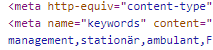

In [58]:
def remove_tags(html):
  
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [60]:
result = remove_tags(soup.prettify())

In [61]:
result

'Elbe-Elster Klinikum - Chirurgie Finsterwalde Suchen ... Elbe-Elster Klinikum Leitbild Klinikleitung Qualitätsmanagement Qualitätsberichte Krankenhaushygiene Beauftragte des Klinikums Karriere / Ausbildung EEK als Arbeitgeber Stellenangebote Ausbildung, Studium, FSJ und Praktikum Facharztausbildung Klinikum im Cartoon Akademisches Lehrkrankenhaus MHB Elbe-Elster MVZ GmbH Standorte Elsterwerda Finsterwalde Herzberg Fachbereiche Im Überblick Anästhesie und Intensivmedizin Anästhesie und Intensivmedizin Elsterwerda Anästhesie und Intensivmedizin Finsterwalde Anästhesie und Intensivmedizin Herzberg Chirurgie Chirurgie Elsterwerda Chirurgie Finsterwalde Chirurgie Herzberg Gynäkologie und Geburtshilfe Gynäkologie Elsterwerda Gynäkologie Finsterwalde Gynäkologie / Geburtshilfe Herzberg Gynäkologie Urogynäkologie Geburtshilfe Kreißsaalführung Innere Medizin Innere Medizin Elsterwerda Innere Medizin Finsterwalde Innere Medizin Herzberg Endoskopiezentrum Südbrandenburg Pädiatrie Pädiatrie Herzb

In [ ]:
td = soup.find('name') #<td>My home address</td>